### Machine Learning Model Explanation

The machine learning model used for detecting impossibility 

#### Neural Network Model

The neural network consists of an input layer, two hidden layers, and an output layer. The network uses the ReLU activation function for the hidden layers and the Sigmoid activation function for the output layer.

#### Mathematical Formulation

1. **Input Layer**:
   - Let **x** ∈ ℝⁿ be the input feature vector, where *n = 9* (the number of input features).

2. **First Hidden Layer**:
   - **Weights**: **W₁** ∈ ℝ⁶⁴ˣⁿ
   - **Biases**: **b₁** ∈ ℝ⁶⁴
   - **Activation**: ReLU
   - **Output**: 
     $$ \mathbf{h}_1 = \text{ReLU}(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) $$

3. **Second Hidden Layer**:
   - **Weights**: **W₂** ∈ ℝ³²ˣ⁶⁴
   - **Biases**: **b₂** ∈ ℝ³²
   - **Activation**: ReLU
   - **Output**: 
     $$ \mathbf{h}_2 = \text{ReLU}(\mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2) $$

4. **Output Layer**:
   - **Weights**: **W₃** ∈ ℝ¹ˣ³²
   - **Biases**: **b₃** ∈ ℝ¹
   - **Activation**: Sigmoid
   - **Output**: 
     $$ \hat{y} = \sigma(\mathbf{W}_3 \mathbf{h}_2 + \mathbf{b}_3) $$

#### Activation Functions

- **ReLU (Rectified Linear Unit)**:
  $$ \text{ReLU}(z) = \max(0, z) $$

- **Sigmoid**:
  $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

#### Loss Function

The loss function used is Binary Cross-Entropy Loss, given by:

$$ \mathcal{L}(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} \left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right] $$

where *yᵢ* is the true label, *\hat{y}ᵢ* is the predicted probability, and *m* is the number of samples.

#### Optimization

The weights and biases of the neural network are optimized using the Adam optimizer, which updates the parameters based on the gradients of the loss function.

#### Summary of the Formulas

1. **First Hidden Layer**:
   $$ \mathbf{h}_1 = \text{ReLU}(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) $$

2. **Second Hidden Layer**:
   $$ \mathbf{h}_2 = \text{ReLU}(\mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2) $$

3. **Output Layer**:
   $$ \hat{y} = \sigma(\mathbf{W}_3 \mathbf{h}_2 + \mathbf{b}_3) $$

4. **Loss Function**:
   $$ \mathcal{L}(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} \left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right] $$


Epoch [10/10], Loss: 0.6115, Accuracy: 0.8851


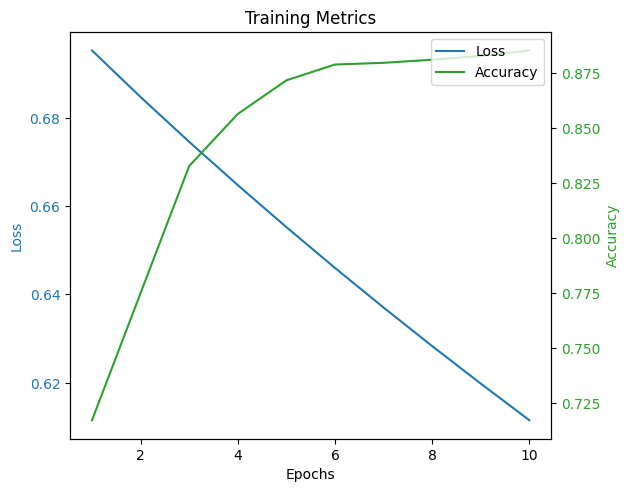

Accuracy: 0.8872


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('../simulation_results2.csv')

# Features and target variable
features = data[['votesA', 'votesB', 'area', 'perimeter', 'pp_compactness', 'eg', 'win_count_a', 'win_count_b', 'total_votes']]
target = data['imp_flag']

# Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Define the neural network
class GerrymanderingNN(nn.Module):
    def __init__(self):
        super(GerrymanderingNN, self).__init__()
        self.layer1 = nn.Linear(9, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Instantiate the model, define the loss function and the optimizer
model = GerrymanderingNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
metrics = {'loss': [], 'accuracy': []}

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    with torch.no_grad():
        y_pred = model(X_train)
        y_pred_class = y_pred.round()
        accuracy = (y_pred_class.eq(y_train).sum().float() / y_train.shape[0]).item()
    
    # Store metrics
    metrics['loss'].append(loss.item())
    metrics['accuracy'].append(accuracy)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

plot_metrics(metrics)
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = y_pred.round()
    accuracy = (y_pred_class.eq(y_test).sum().float() / y_test.shape[0]).item()
    print(f'Accuracy: {accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'gerrymandering_model.pth')


In [2]:
import matplotlib.pyplot as plt

def plot_metrics(metrics):
    """
    Plots the key metrics such as loss and accuracy.

    Parameters:
    - metrics (dict): A dictionary containing lists of metrics to plot. Keys should include 'loss' and 'accuracy'.
    """
    epochs = range(1, len(metrics['loss']) + 1)

    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs, metrics['loss'], color=color, label='Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(epochs, metrics['accuracy'], color=color, label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Training Metrics')
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.show()
